# Learn Data

* Dataset : di ambil dari kagle https://www.kaggle.com/code/renzwicked/classification-water-quality/input
keterangan:
1. ph: pH 1. air (0 sampai 14).
2. Kekerasan: Kapasitas air untuk mengendapkan sabun dalam mg/L.
3. Padatan: Total padatan terlarut dalam ppm.
4. Chloramines: Jumlah Chloramines dalam ppm.
5. Sulfat: Jumlah Sulfat yang dilarutkan dalam mg/L.
6. Konduktivitas: Konduktivitas listrik air dalam μS/cm.
7. Karbon_organik: Jumlah karbon organik dalam ppm.
8. Trihalometana: Jumlah Trihalometana dalam μg/L.
9. Kekeruhan: Ukuran sifat air yang memancarkan cahaya di NTU.
10. Dapat Diminum: Menunjukkan apakah air aman untuk dikonsumsi manusia. Dapat Diminum = 1 dan Tidak Dapat Diminum = 0
* terdapat 9 fitur dengan 1 label
* Metode yang digunakan : KNN

In [191]:
# masuk ke direktori projek_ml
%cd /content/drive/MyDrive/projek_ml

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/projek_ml'
c:\Users\Lenovo\Documents\ML\projek


In [192]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
import pickle

In [193]:
# menampilkan dataset
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [194]:
# Mengecek dimensi dataset sehingga dihasilkan dalam dataset water potability memiliki dimensi dataset (3276, 10) yang artinya dalam dataset terdapat 3276 baris data dan 10 kolom.
df.shape

(3276, 10)

# Persiapan Data

In [195]:
df.isnull().sum()

#Melakukan pengecekan apakah didalam dataset terdapat data yang bernilai null atau tidak. Setelah dilakukan pengecekan
#dihasilkan bahwa pada dataset terdapat data yang bernilai null diantaranya 491 data dari fitur ph, 781 data dari fitur Sulfate, dan 181 data dari fitur Trihalomethanes.

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [196]:
df['Sulfate'] = df['Sulfate'].fillna(value=df['Sulfate'].median())
df['ph'] = df['ph'].fillna(value=df['ph'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median())
df

#Karena dari pengecekan isnull terdapat 3 fitur yang memiliki nilai null maka dilakukan penanganan untuk nilai nullnya dengan mengisikan data yang bernilai null dengan 
#median atau nilai tengah dari data yang ada dalam setiap fitur.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [197]:
df.isnull().sum()
#Setelah dilakukan penanganan terhadap data yang bernilai null, maka dilakukan pengecekan kembali. 
#Hasilnya menunjukkan bahwa didalam dataset sudah tidak ada data yang bernilai null.

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [198]:
# num_col = (df.columns).to_list()
# num_col = num_col[0:]

In [199]:
# def detect_outliers_iqr(data):
#     outliers = []
#     data = sorted(data)
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)
#     IQR = q3-q1
#     lwr_bound = q1-(1.5*IQR)
#     upr_bound = q3+(1.5*IQR)
#     print('lower bound : ', lwr_bound, '; upper bound : ', upr_bound)
#     for i in data: 
#         if (i<lwr_bound or i>upr_bound):
#             outliers.append(i)
#     return outliers
# # Code diatas digunakan untuk mengidentifikasi apakah pada setiap fitur yang digunakan terdapat outlier atau tidak

In [200]:
# #Mendeteksi outliers dengan menggunakan boxplot
# fig, axs = plt.subplots(3,3, figsize = (15,7.5))
# plt1 = sns.boxplot(df['ph'], ax = axs[0,0])
# plt2 = sns.boxplot(df['Hardness'], ax = axs[0,1])
# plt3 = sns.boxplot(df['Solids'], ax = axs[0,2])
# plt4 = sns.boxplot(df['Chloramines'], ax = axs[1,0])
# plt5 = sns.boxplot(df['Sulfate'], ax = axs[1,1])
# plt6 = sns.boxplot(df['Conductivity'], ax = axs[1,2])
# plt7 = sns.boxplot(df['Organic_carbon'], ax = axs[2,0])
# plt8 = sns.boxplot(df['Trihalomethanes'], ax = axs[2,1])
# plt9 = sns.boxplot(df['Turbidity'], ax = axs[2,2])

# plt.tight_layout()


Code diatas digunakan untuk memvisualisasikan hasil outlier dari setiap fiturnya yang pada dari gambar diatas dapat diketahui bahwa pada setiap fitur mempunyai outlier sehingga perlu dilakukan penanganan.

In [201]:
#Membuat fungsi outliers untuk mengatasi outliers
def outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(df)):
      if df[column].iloc[i] > upper_bound:
          df[column].iloc[i] = upper_bound
      if df[column].iloc[i] < lower_bound:
          df[column].iloc[i] = lower_bound

for feature in num_col:
  outliers(df, feature)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_54548\303008666.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i] = lower_bound
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_54548\303008666.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[i] = upper_bound


Karena pada pengecekan outlier teridentifikasi adanya outlier pada setiap fiturnya, maka code diatas digunakan untuk mengatasi outliernya dengan menggunakan quantile, lower bound, dan upper bound.

In [202]:
# #Mendeteksi outliers dengan menggunakan boxplot
# fig, axs = plt.subplots(3,3, figsize = (15,7.5))
# plt1 = sns.boxplot(df['ph'], ax = axs[0,0])
# plt2 = sns.boxplot(df['Hardness'], ax = axs[0,1])
# plt3 = sns.boxplot(df['Solids'], ax = axs[0,2])
# plt4 = sns.boxplot(df['Chloramines'], ax = axs[1,0])
# plt5 = sns.boxplot(df['Sulfate'], ax = axs[1,1])
# plt6 = sns.boxplot(df['Conductivity'], ax = axs[1,2])
# plt7 = sns.boxplot(df['Organic_carbon'], ax = axs[2,0])
# plt8 = sns.boxplot(df['Trihalomethanes'], ax = axs[2,1])
# plt9 = sns.boxplot(df['Turbidity'], ax = axs[2,2])

# plt.tight_layout()

In [203]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.889107,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,44831.869873,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [204]:
data= df.to_csv('data.csv', index=None)
data=pd.read_csv('data.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.889107,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,44831.869873,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


# Membuat Model

In [205]:
X = df.iloc[:,0:9].values
y = df.iloc[:,-1].values
# memisahkan antara fitur dengan label

In [206]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)
# melakukan split data sebesar 20% testing dan 80% training
print('Total data training : ', len(X_train))
print(X_test[0])
print('Total data testing : ', len(X_test))

Total data training :  2620
[5.28798281e+00 2.45023461e+02 2.77337131e+04 7.13506344e+00
 2.67157960e+02 4.64074850e+02 1.34521795e+01 5.56423632e+01
 3.31103400e+00]
Total data testing :  656


In [207]:
# Melakukan skala menggunakan standard scaaler
# Tujuannya agar rentang data dan nilai antar atribut sama
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [208]:
X_test[0]

array([-1.26514505,  1.49693724,  0.67537362,  0.01039895, -2.07850427,
        0.4621911 , -0.28734485, -0.70374458, -0.78986396])

In [209]:
# Menjalankan knn dengan k = 9
knn_clf = KNeighborsClassifier(n_neighbors=11, metric = 'euclidean')
knn_clf.fit(X_train,y_train)
# Menjalankan prediksi
y_pred = knn_clf.predict(X_test)

In [210]:
# Cek akurasi
round(accuracy_score(y_test,y_pred)*100)

65

In [211]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[349,  50],
       [178,  79]], dtype=int64)

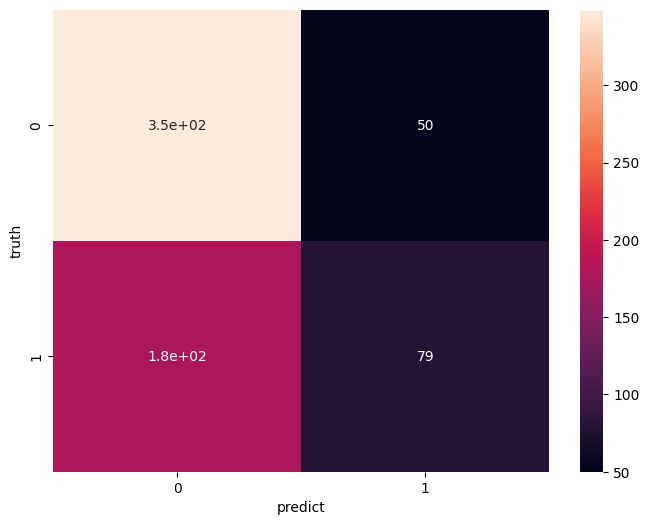

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot= True)
plt.xlabel('predict')
plt.ylabel('truth')
plt.show()

In [213]:
print('Precision: {}'.format(precision_score(y_test,y_pred, average='macro')))
print('Recall: {}'.format(recall_score(y_test,y_pred, average='macro')))
print('F1-Score: {}'.format(f1_score(y_test,y_pred, average='macro')))

Precision: 0.6373210949796273
Recall: 0.5910398564504646
F1-Score: 0.5815530612473282


In [214]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       399
           1       0.61      0.31      0.41       257

    accuracy                           0.65       656
   macro avg       0.64      0.59      0.58       656
weighted avg       0.64      0.65      0.62       656



In [215]:
with open('knn_pickle','wb') as r:
   pickle.dump(knn_clf,r)
with open('scaler_pickle','wb') as r:
   pickle.dump(scaler,r)

In [216]:
inp1=[[8.635848719,203.3615226,13672.09176,4.563008686,303.3097712,474.6076449,12.3638167,62.79830896,4.401424715]]
inp = [[6.615350135,179.2406613,26392.86361,9.309160027,333.0735457,496.3635615,12.78659537,78.26236862,4.453443265]]
with open('knn_pickle', 'rb') as r:
   d = pickle.load(r)
with open('scaler_pickle', 'rb') as r:
   data = pickle.load(r)
X_pred = d.predict((data.transform(inp)))
X_pred

array([1], dtype=int64)

Best Accuracy Score: 0.6631 Best K-Score: 11


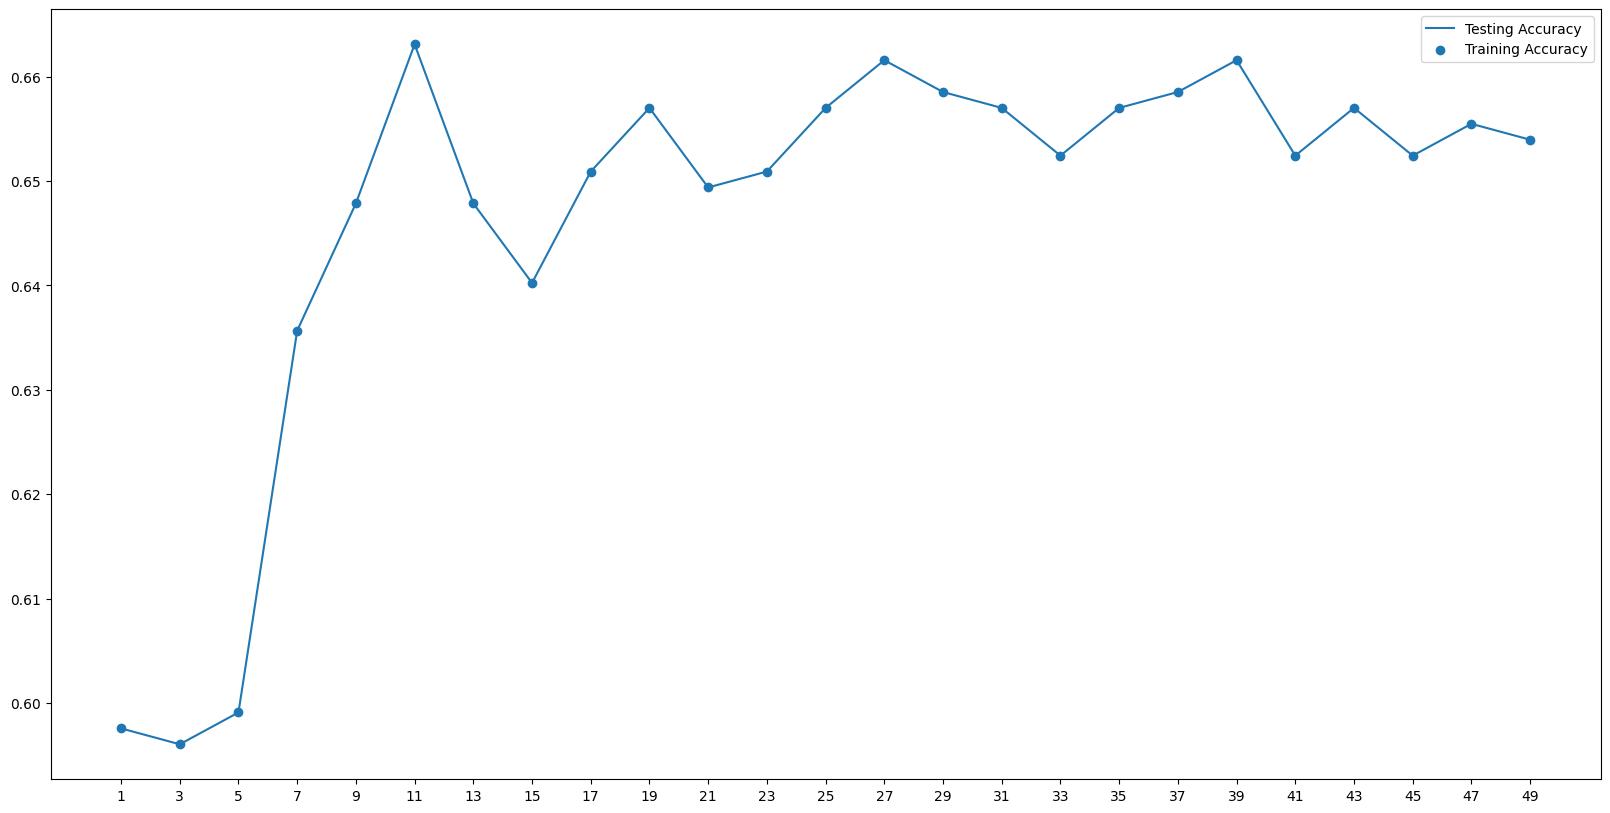

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find Best K
def akurasi_terbaik(df):
    k = range(1, 50, 2)  # (1, 3, 5, 7,...., 49)
    testing_accuracy = []
    training_accuracy = []
    score = 0
    
    for i in k:
        X = df.iloc[:, 0:9].values
        y = df.iloc[:, -1].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        knn_clf = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
        knn_clf.fit(X_train, y_train)
        
        y_pred_train = knn_clf.predict(X_train)
        training_accuracy.append(accuracy_score(y_train, y_pred_train))
        
        y_pred_test = knn_clf.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred_test)
        testing_accuracy.append(acc_score)
        
        if score < acc_score:
            score = acc_score
            best_k = i
    
    print('Best Accuracy Score:', round(score, 4), 'Best K-Score:', best_k)
    
    # Plotting Why Best K
    plt.figure(figsize=(20, 10))
    plt.plot(k, testing_accuracy)
    plt.scatter(k, testing_accuracy)
    # plt.plot(k, training_accuracy)
    # plt.scatter(k, training_accuracy)
    plt.xticks(np.arange(1, 51, 2))
    plt.legend(['Testing Accuracy', 'Training Accuracy'])
    plt.show()
akurasi_terbaik(df)

Jika melihat output diatas, dapat disimpulkan bahwa K (sementara) yang terbaik adalah K = 11. Nilai akurasinya mencapai 67.07%. Akurasi yang dimaksudkan disini adalah akurasi dari model (yang difit dengan menggunakan data train) yang dicoba terhadap data test. Jika melihat grafiknya, fokuskan pada line chart berwarna biru. Titik tertingginya ada pada K = 11 sehingga titik tersebutlah yang menjadi K yang terbaik.